# PSO

In [1]:
import time
import numpy as np
import pandas as pd
import random
from vmdpy import VMD
start_time = time.time()

np.random.seed(1)
random.seed(1)

VMD_df = pd.read_csv('./SSEC High highest-frequency noise subsequence.csv', index_col=0,usecols=[0,1])
VMD_df = VMD_df.values
VMD_df=np.array(VMD_df).flatten()
VMD_df

tau = 0. 
DC = 0    
init = 1  
tol = 1e-7  

W = 0.5                               
c1 = 0.2                               
c2 = 0.5                                
n_iterations = 50                      
n_particles = 30                       
low = [3, 100]
up = [10, 3000]
var_num = 2
bound = (low,up)

def fitness_function(position):
    K = int(position[0])
    alpha = position[1]
    if K < bound[0][0]:
        K = bound[0][0]
    if K > bound[1][0]:
        K = bound[1][0]
        
    if alpha < bound[0][1]:
        alpha = bound[0][1]
    if alpha > bound[1][1]:
        alpha = bound[1][1]

    u, u_hat, omega = VMD(VMD_df, alpha, tau, K, DC, init, tol)
    
    reconstructed_signal = np.sum(u, axis=0)

    error = np.mean(np.abs(VMD_df - reconstructed_signal))

    return error

pop_x = np.zeros((n_particles,var_num))
g_best = np.zeros(var_num)
temp = float('inf')
for i in range(n_particles):
    for j in range(var_num):
        pop_x[i][j] = np.random.rand()*(bound[1][j]-bound[0][j])+bound[0][j]
    fit = fitness_function(pop_x[i])
   
    if fit < temp:
        g_best = pop_x[i]
        temp = fit

pbest_position = pop_x
pbest_fitness_value = np.zeros(n_particles)

gbest_fitness_value = np.zeros(var_num)

gbest_position = g_best
velocity_vector = ([np.array([0, 0]) for _ in range(n_particles)])
iteration = 0

while iteration < n_iterations:

    for i in range(n_particles):

        fitness_cadidate = fitness_function(pop_x[i])

        if (pbest_fitness_value[i] > fitness_cadidate):
            pbest_fitness_value[i] = fitness_cadidate
            pbest_position[i] = pop_x[i]

        elif (gbest_fitness_value[1] > fitness_cadidate):
            gbest_fitness_value[1] = fitness_cadidate
            gbest_position = pop_x[i]

        elif (gbest_fitness_value[0] < fitness_cadidate):
            gbest_fitness_value[0] = fitness_cadidate
            gbest_position = pop_x[i]

    for i in range(n_particles):
        new_velocity = (W * velocity_vector[i]) + (c1 * random.random()) * (
                    pbest_position[i] - pop_x[i]) + (c2 * random.random()) * (
                                   gbest_position - pop_x[i])
        new_position = new_velocity + pop_x[i]
        pop_x[i] = new_position

    iteration = iteration + 1

print("The best position is that","K is", int(gbest_position[0]),"and alpha is",int(gbest_position[1]))

The best position is that K is 3 and alpha is 2567


# VMD

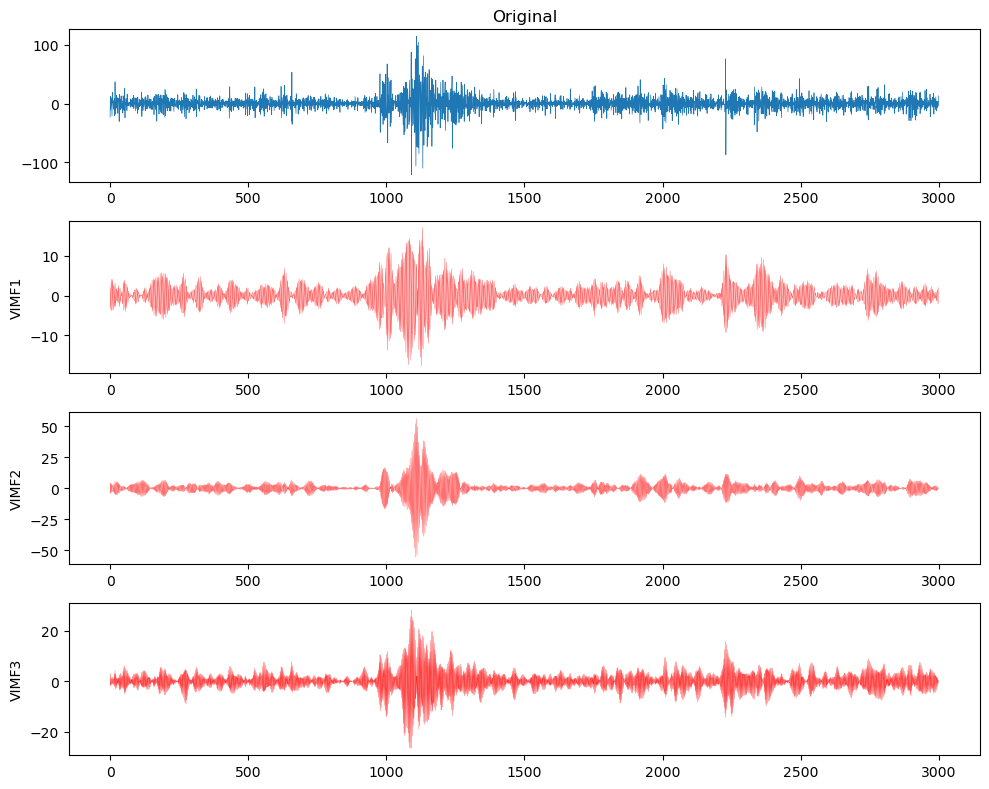

In [2]:
import matplotlib.pyplot as plt
from vmdpy import VMD

K = int(gbest_position[0])    
alpha = int(gbest_position[1])     

u, u_hat, omega = VMD(VMD_df, alpha, tau, K, DC, init, tol)
u.shape

VIMFs_full_imf=pd.DataFrame(u)
VIMFs=VIMFs_full_imf.T
VIMFs

plt.figure(figsize=(10, 8))

plt.subplot(K+1, 1, 1)
plt.plot(VMD_df, linewidth=0.5)
plt.title("Original")
for i in range(K):
    plt.subplot(K+1, 1, i+2)
    plt.plot(u[i, :], linewidth=0.2, c='r')
    plt.ylabel('VIMF{}'.format(i + 1))

plt.tight_layout()
plt.show()

In [3]:
VIMFs.to_csv('./SSEC High VIMFs.csv')

In [4]:
end_time = time.time()
execution_time = end_time - start_time
print("Execution time: {:.2f} seconds".format(execution_time))

Execution time: 334.05 seconds
